In [1]:
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
tf.__version__

'2.9.1'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4608379596183448415
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6938689536
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18373677350902262576
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:65:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [3]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(224, 224, 3))

In [4]:
conv_base.trainable = True # l'entrainement va pas affecter cette partie
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
import os
import cv2
import numpy as np

def load_data (data_path,img_shape, rot=0):
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    num_channel=img_shape[2]

    labels=[]
    data=[]
    len_list_img=0
    num_class=0
    #for dataset in data_dir_list:

    input_img=cv2.imread(data_path)
    input_img = ndimage.rotate(input_img, rot)

    input_img=cv2.resize(input_img,(img_rows,img_cols))
    
    return input_img
    
    '''data.append(input_img)
    labels.append(num_class)
    num_class+=1
    
    data = np.array(data)
    data = data.astype('float32')
    #data /= 255
    labels=np.array(labels)
    print('data shape',data.shape)
    print('labels shape',labels.shape)
    return data, labels'''

1/1 [==============================] - 0s 24ms/step
[[('n03967562', 'plow', 0.44777673), ('n03467068', 'guillotine', 0.07459907), ('n03804744', 'nail', 0.06071065), ('n03384352', 'forklift', 0.05696948), ('n03496892', 'harvester', 0.051148947)]]


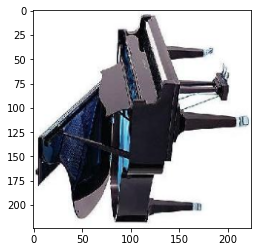

In [10]:
img_shape=[224,224,3]
test_image = load_data("../Caltech256/test/091.grand-piano-101/091_0047.jpg",img_shape, rot=90)
print(tf.keras.applications.imagenet_utils.decode_predictions(conv_base.predict(np.array([test_image]))))
plt.imshow(test_image)

In [ ]:
test_image.shape